In [2]:
import sympy
# Use p as a symbolic variable
from sympy.abc import p
# The binomial coefficient function (n choose k)
from scipy.special import comb

result = ((1-p) * sum([comb(8, k) * p**k * (1-p)**(8-k)
for k in range(5, 9)]) + p * sum([comb(8, k) * p**k * (1-p)**(8-k)
for k in range(4, 9)]))
print(sympy.simplify(result))

p**5*(70.0*p**4 - 315.0*p**3 + 540.0*p**2 - 420.0*p + 126.0)


In [66]:
#Now for game of life
result =  p * sum([comb(8, k) * p**k * (1-p)**(8-k)
for k in range(3, 5)]) + ((1-p) * sum([comb(8, k) * p**k * (1-p)**(8-k)
for k in range(3, 4)]))

print(sympy.simplify(result))


p**3*(p - 1)**4*(p*(14.0*p + 56.0) + 56.0*(p - 1)**2)


In [68]:
import numpy as np
import matplotlib.pyplot as plt

def f(p):
    return p**3*(p - 1)**4*(p*(14.0*p + 56.0) + 56.0*(p - 1)**2)

y = np.linspace(0,10,11)

plt.plot(x,f(y))

NameError: name 'x' is not defined

In [7]:
import matplotlib.pyplot as plt
from scipy import cos, linspace

def f(p):
    return p**3*(p - 1)**4*(p*(14.0*p + 56.0) + 56.0*(p - 1)**2)

def cobweb(f, x0, N, a=0, b=1):
    # plot the function being iterated
    t = linspace(a, b, N)
    plt.plot(t, f(t), 'k')

    # plot the dotted line y = x
    plt.plot(t, t, "k:")
    
    # plot the iterates
    x, y = x0, f(x0)
    for _ in range(N):
        fy = f(y)        
        plt.plot([x, y], [y,  y], 'a', linewidth=1)
        plt.plot([y, y], [y, fy], 'b', linewidth=1)
        x, y = y, fy

    plt.axes().set_aspect(1) 
    plt.show()
    plt.close()
    
class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')

plot_cobweb(func, 2.8, 0.2)
plot_cobweb(func, 3.8, 0.2, 200)

cobweb(f,0.8, 20)

NameError: name 'plot_cobweb' is not defined

In [1]:
interactive = True  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import numpy as np


class MajoritySimulator:

    def __init__(self, size=100, initial_density=0.1, radius=1, interactive=True):
        '''
        Initialize new MajoritySimulator object with default parameter settings.

        Inputs:

            size (int) The number of cells along each dimension of the
              2-dimensional grid. Default: 100.

            initial_density (float) The proportion of cells that will be
              active (1) when the cellular automaton is initialized. The
              active cells will be at random locations. Default: 0.1.

            radius (int) The radius of the neighborhoods in the CA.
              Must be a positive integer. Default: 1.

            interactive (bool) Whether or not we are running an interactive
              simulation. In CoCalc we have to run in non-interactive mode
              (False), but in your local Python environment you should be
              able to run in interactive mode (True). Default: True.
        '''
        self.interactive = interactive
        self.size = size
        self.radius = radius
        self.initial_density = initial_density

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros((size, size))

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''

        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        random_indexes = np.random.choice(
            range(self.size ** 2),
            size=int(round(self.initial_density * self.size ** 2)),
            replace=False)

        # Fill the entire state array with zeros.
        self.current_state.fill(0)

        # Note: the flat attribute, used below, allows you to treat a multi-
        # dimensional array like a 1-dimensional array with the same number
        # of cells.
        self.current_state.flat[random_indexes] = 1

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        if self.interactive:
            plt.cla()  # Clear the current figure
        else:
            plt.figure()  # Create a new figure
        plt.imshow(self.current_state, vmin = 0, vmax = 1, cmap = plt.cm.binary)
        if not self.interactive:
            plt.show()

    def update(self):
        '''
        Update the state of the cellular automaton.
        '''
        total = np.zeros(self.current_state.shape)
        for dx in range(-self.radius, self.radius+1):
            shifted_state = np.roll(self.current_state, shift=dx, axis=1)
            for dy in range(-self.radius, self.radius+1):
                total += np.roll(shifted_state, shift=dy, axis=0)
        cells_in_neighborhood = (2 * self.radius + 1) ** 2
        majority_threshold = cells_in_neighborhood // 2 + 1
        self.current_state = total // majority_threshold

    def set_initial_density(self, value=None):
        '''
        The initial density of active cells. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.initial_density = min(1, max(0, float(value)))
        return self.initial_density

    def set_radius(self, value=None):
        '''
        The radius of the cellular automaton. Must be a positive integer.
        '''
        if value is not None:
            self.radius = int(value)
        return self.radius

In [2]:
# Set up the simulation
sim = MajoritySimulator(initial_density=0.45, radius=1, interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_initial_density, sim.set_radius])
    gui.start(func=[sim.initialize, sim.draw, sim.update])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.draw()

    print('After steps 1-5:')
    for i in range(1, 6):
        sim.update()
        sim.draw()

    print('After steps 100-500')
    for i in range(6, 101):
        sim.update()
    sim.draw()
    for i in range(200, 501, 100):
        for j in range(100):
            sim.update()
        sim.draw()

TclError: bad window path name ".!frame"

In [59]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

import matplotlib
%matplotlib inline

import pylab as PL
import random as RD
import scipy as SP
import numpy as np 

RD.seed()

width = 100
height = 100
empty, tree, fire, char = range(4)

def init(initProb):
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1
    
    densities.append(np.count_nonzero(config == 3)/((np.count_nonzero(config == 1))+np.count_nonzero(config == 2)+np.count_nonzero(config == 3)))
    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

In [60]:
init_probs = np.linspace(0,1,20)
record = []

for i in init_probs:
    densities = []
    init(i)
    for i in range(100):
        step()
    record.append(densities[-1])
    
print(record)

[1.0, 0.004140786749482402, 0.002838221381267739, 0.0012894906511927789, 0.0019408054342552159, 0.0049410870391486126, 0.011439466158245948, 0.0019001085776330076, 0.5110328638497652, 0.9541904158750264, 0.9946390963048056, 0.9986209274263058, 0.9996822875297855, 0.999854376001165, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [62]:
print(init_probs)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


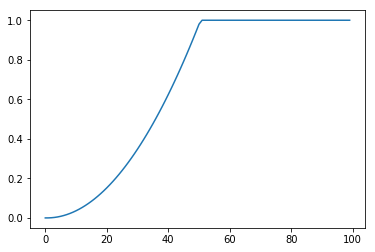

In [63]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,99,100), densities)